In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import graphviz 

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Regression

 Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

 Equation of simple linear regression:
 y = a + b*x

 y: dependant variable

 x: independent variable

 a: intercept which is the point where the function crosses the y-axis.
 
 b: coeffecient or slope

In [ ]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


[gradient descent playlist](https://youtube.com/playlist?list=PLoWngp8dMOR97FtS-cbD1aYSndz14tSIU)

## Regression in one variable

**We'll try to fit a (aX + b) line**

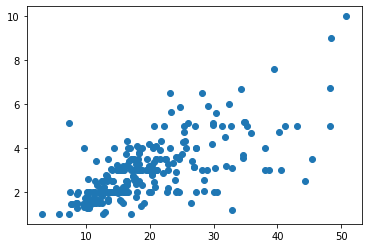

In [ ]:
plt.scatter(x=tips['total_bill'], y=tips['tip'])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tips[['total_bill']], tips[['tip']], test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(195, 1) (195, 1)
(49, 1) (49, 1)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_ # a

array([[0.10869887]])

In [ ]:
model.intercept_ # b

array([0.90176629])

In [ ]:
model.score(x_train, y_train)

0.47864006213935983

In [ ]:
model.score(x_test, y_test)

0.3220786627230361

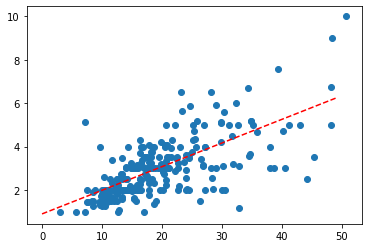

In [ ]:
a = model.coef_[0, 0]
b = model.intercept_[0]
x = np.arange(0, 50)
y = a*x + b
plt.scatter(x=tips['total_bill'], y=tips['tip'])
plt.plot(x, y, 'r--')
plt.show()

## Regression in 2 Variables
linear regression in n-dimentional is a (n-1) dimensions plane 

[3D visualization refrence](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)

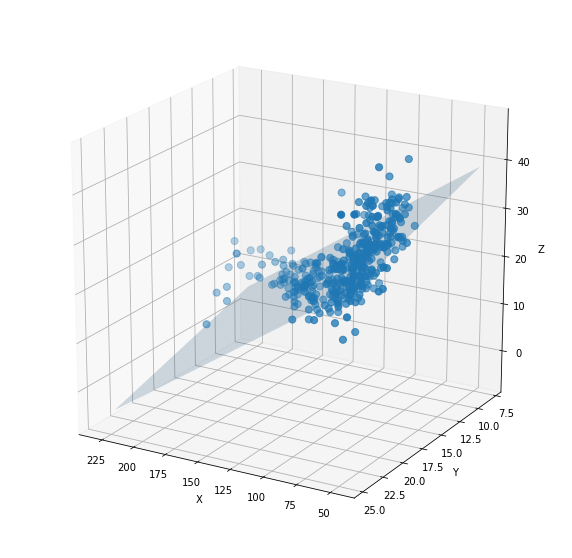

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tips[['total_bill', 'size']], tips[['tip']], test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(195, 2) (195, 1)
(49, 2) (49, 1)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_train, y_train)

0.516034241293616

In [ ]:
model.score(x_test, y_test)

0.15819047976642997

## N-variables regression

In [ ]:
tips_dummies = pd.get_dummies(tips)
tips_dummies.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tips_dummies.drop(columns=['tip']), tips_dummies[['tip']], test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(195, 12) (195, 1)
(49, 12) (49, 1)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_train, y_train)

0.46985005283755754

In [ ]:
model.score(x_test, y_test)

0.42569333038473

# Classification

In [ ]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


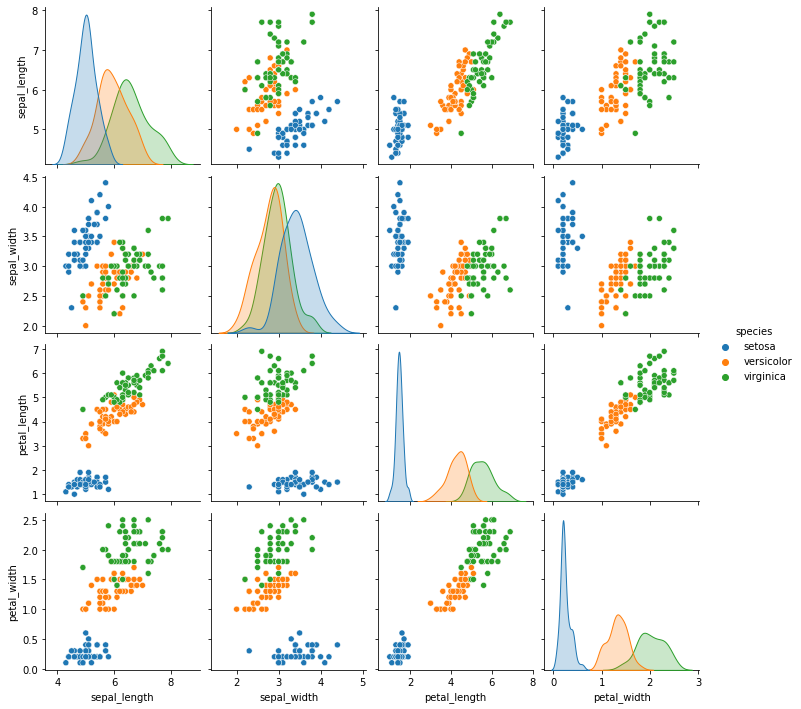

In [ ]:
sns.pairplot(iris, hue='species')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    iris[['sepal_length', 'petal_width']], 
    iris[['species']], 
    test_size=0.2,
    shuffle=True
)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 2) (120, 1)
(30, 2) (30, 1)


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

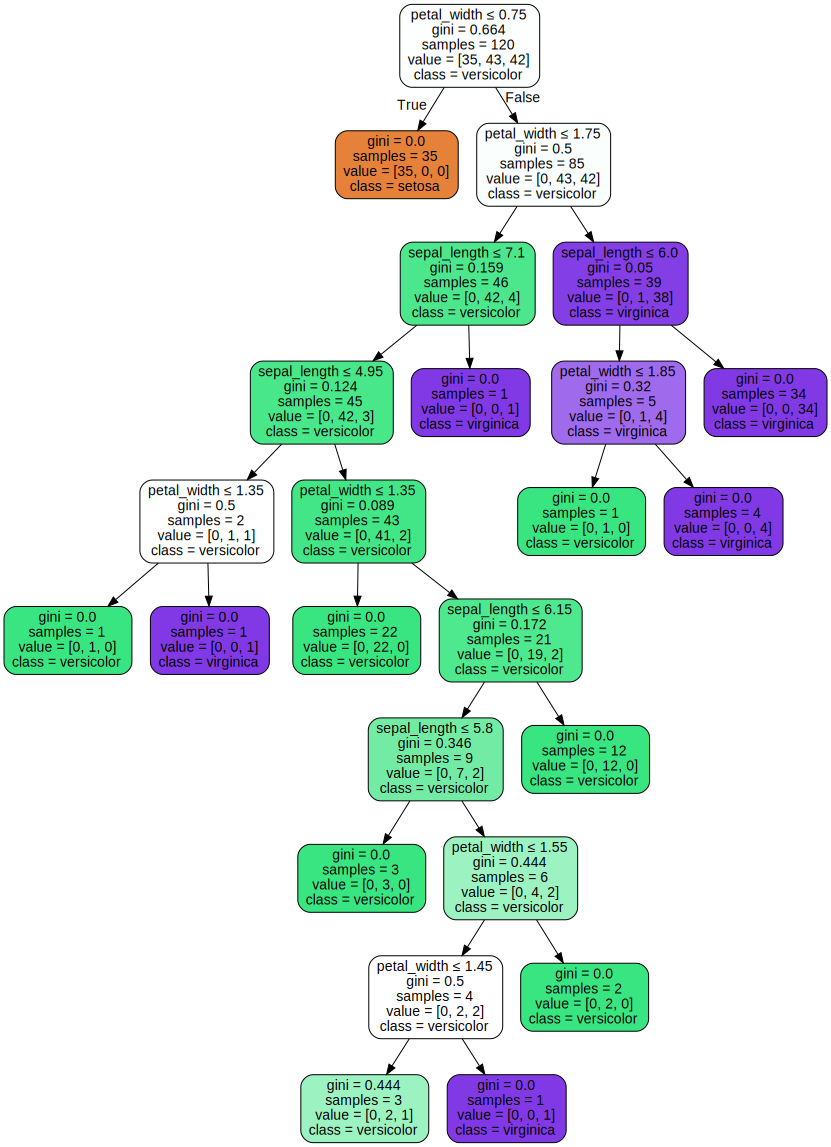

In [ ]:
dot_data = export_graphviz(
    model,
    feature_names=['sepal_length', 'petal_width'],  
    class_names=iris['species'].unique(),  
    filled=True,
    rounded=True,  
    special_characters=True
)  
graph = graphviz.Source(dot_data)  
graph 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



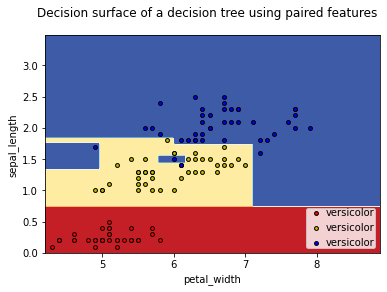

<Figure size 432x288 with 0 Axes>

In [ ]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

mapper = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
X = x_train.values
y = y_train['species'].map(mapper).values

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.vectorize(mapper.get)(Z)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y_train.values.ravel()[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.xlabel('petal_width')
plt.ylabel('sepal_length')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()

In [ ]:
model.score(x_train, y_train)

0.9916666666666667

In [ ]:
model.score(x_test, y_test)

0.8333333333333334

## Fixing overfitting

This classifier is overfitting

we need to specifiy a `max depth` and `min_samples_split` for the tree

In [ ]:
model = DecisionTreeClassifier(max_depth=4, min_samples_split=6)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=6)

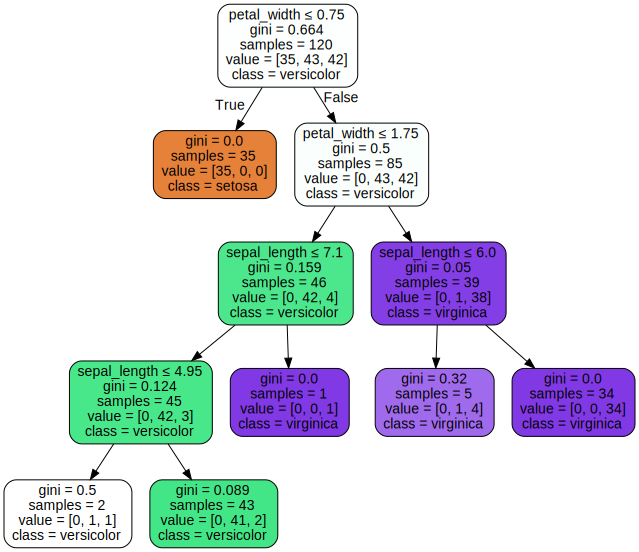

In [ ]:
dot_data = export_graphviz(
    model,
    feature_names=['sepal_length', 'petal_width'],  
    class_names=iris['species'].unique(),  
    filled=True,
    rounded=True,  
    special_characters=True
)  
graph = graphviz.Source(dot_data)  
graph 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



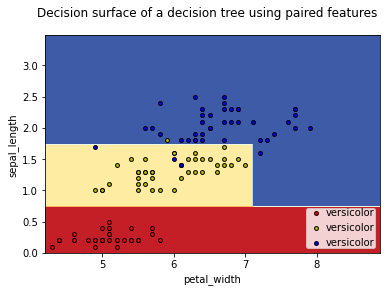

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


mapper = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
X = x_train.values
y = y_train['species'].map(mapper).values

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.vectorize(mapper.get)(Z)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)


for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y_train.values.ravel()[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.xlabel('petal_width')
plt.ylabel('sepal_length')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()

In [ ]:
model.score(x_train, y_train)

0.9666666666666667

In [ ]:
model.score(x_test, y_test)

0.9666666666666667